In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [103]:
df = pd.read_csv('economic_index.csv')

In [104]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [105]:
df.notnull()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


In [107]:
##Drop the uneccery values
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [108]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [109]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

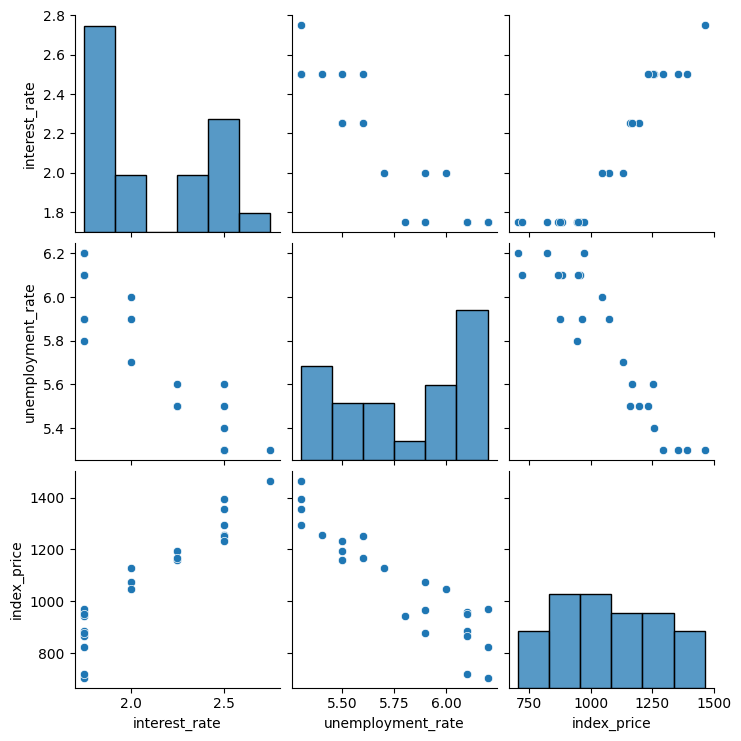

In [110]:
##Visulisation
sns.pairplot(df)

In [111]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

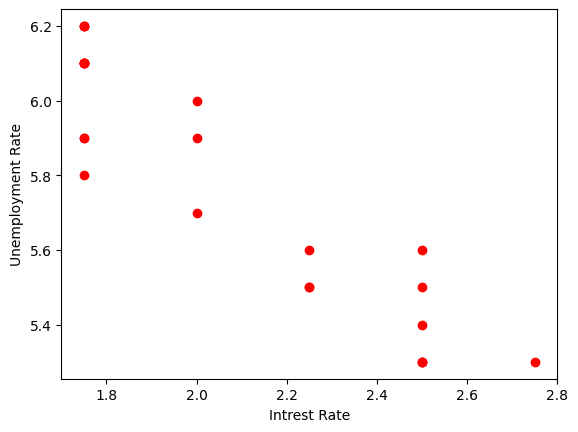

In [112]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('Intrest Rate')
plt.ylabel('Unemployment Rate')

In [113]:
##indepedent and depended features
X = df[['interest_rate','unemployment_rate']]

In [114]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [115]:
Y = df[['index_price']]
Y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [116]:
from sklearn.model_selection import train_test_split

In [125]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=42)

In [126]:
X_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


<Axes: xlabel='interest_rate', ylabel='index_price'>

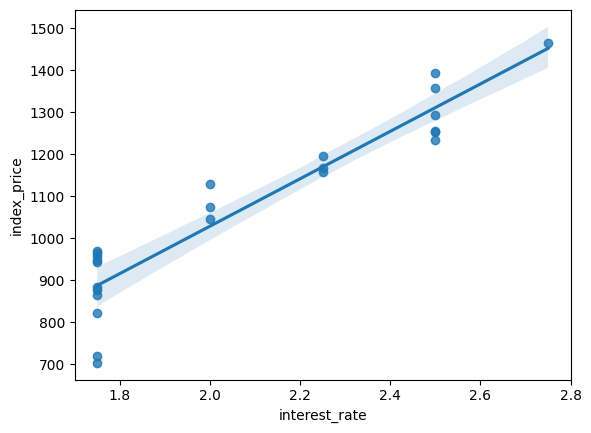

In [127]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])


<Axes: xlabel='unemployment_rate', ylabel='index_price'>

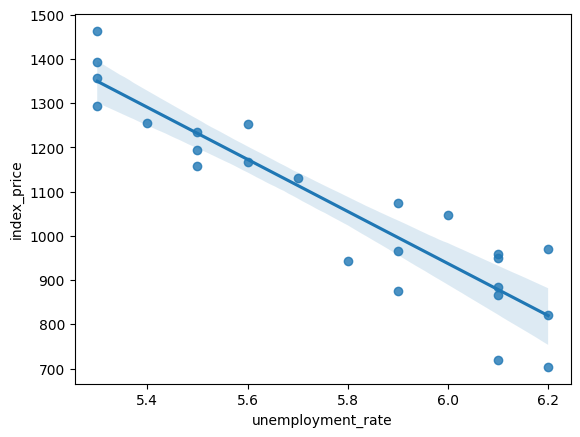

In [128]:
sns.regplot(x=df['unemployment_rate'], y=df['index_price'])

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [131]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [132]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [133]:
regression.fit(X_train,Y_train)

LinearRegression()

In [134]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [136]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [138]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [140]:
Y_pred = regression.predict(X_test)

In [142]:
Y_pred

array([[1180.7466813 ],
       [ 802.74279699],
       [1379.83457045],
       [ 838.52599602],
       [ 973.85313963],
       [1144.96348227]])

In [144]:
from sklearn.metrics import mean_squared_error,mean_squared_error,mean_absolute_error
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse,rmse,rmse)

8108.567426306604 90.04758423359621 90.04758423359621


In [147]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)
#displaY adjusted R-squared
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


Assumptions

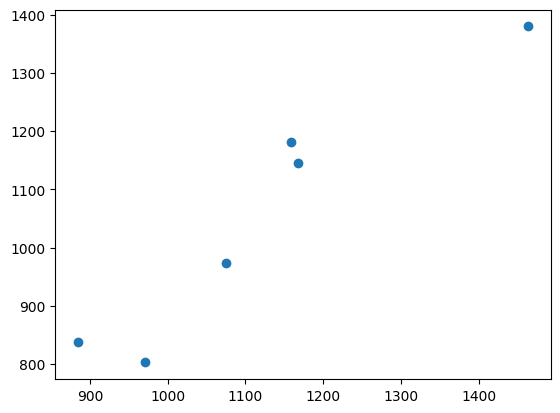

In [150]:
plt.scatter(Y_test,Y_pred)


In [152]:
residuls = Y_test=Y_train
print(residuls)

    index_price
13          965
1          1394
21          822
5          1254
2          1357
12         1047
15          958
3          1293
4          1256
22          704
17          949
20          876
23          719
7          1195
10         1130
14          943
19          866
6          1234


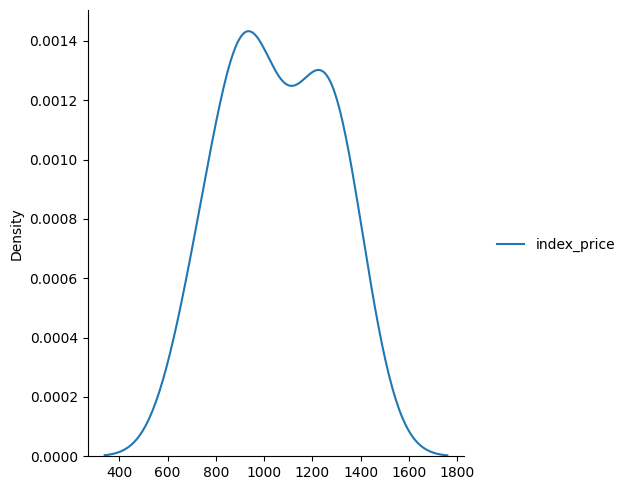

In [154]:
sns.displot(residuls,kind='kde')

In [157]:
print(regression.coef_)

[[  88.27275507 -116.25716066]]
